# Introduction to NumPy
NumPy Notes:

In [4]:
import numpy as np
import matplotlib.pyplot as plt
np.__version__

'2.2.4'

## Differences between lists and NumPy arrays
* Lists - add/delete items, mutable size, different data types
* Arrays - immutable size, same data type, contiguous

In [5]:
gpas_as_list = [3.4, 3.2, 3.6]

In [6]:
# Can add elements to it
gpas_as_list.append(4.0)
# Can have multiple data types
gpas_as_list.insert(1, "Whatevs")
# Can have items removed
gpas_as_list.pop(1)

'Whatevs'

In [7]:
gpas_as_list

[3.4, 3.2, 3.6, 4.0]

In [8]:
gpas = np.array(gpas_as_list)

In [9]:
?gpas

Type:        ndarray
String form: [3.4 3.2 3.6 4. ]
Length:      4
File:        c:\users\blaise\appdata\local\programs\python\python313\lib\site-packages\numpy\__init__.py
Docstring:  
ndarray(shape, dtype=float, buffer=None, offset=0,
        strides=None, order=None)

An array object represents a multidimensional, homogeneous array
of fixed-size items.  An associated data-type object describes the
format of each element in the array (its byte-order, how many bytes it
occupies in memory, whether it is an integer, a floating point number,
or something else, etc.)

Arrays should be constructed using `array`, `zeros` or `empty` (refer
to the See Also section below).  The parameters given here refer to
a low-level method (`ndarray(...)`) for instantiating an array.

For more information, refer to the `numpy` module and examine the
methods and attributes of an array.

Parameters
----------
(for the __new__ method; see Notes below)

shape : tuple of ints
    Shape of created array.
dtype : 

In [10]:
gpas.dtype

dtype('float64')

In [11]:
gpas.itemsize

8

In [12]:
gpas.size

4

In [13]:
len(gpas)

4

In [14]:
gpas.nbytes

32

## Multidimensional arrays
* Keep in mind [floating point precision](https://numpy.org/doc/stable/user/basics.types.html#extended-precision) if adding floats from array
* Data structure is called `ndarray`, representing any **n**umber of **d**imensions
* Arrays can have multiple dimensions, you declare them on creation
* Dimensions help define what each element in the array represents.  A two dimensional array is just an array of arrays
* **Rank** defines how many dimensions an array contains 
* **Shape** defines the length of each of the array's dimensions
* Each dimension is also referred to as an **axis**, and they are zero-indexed. Multiples are called **axes**
* A 2d array is AKA **matrix**

In [15]:
student_gpas = np.array([
    [3.4, 3.2, 3.6, 4.0],
    [3.2, 3.8, 4.0, 4.0],
    [1.2, 2.4, 3.5, 3.8]
], np.float16)
student_gpas

array([[3.4, 3.2, 3.6, 4. ],
       [3.2, 3.8, 4. , 4. ],
       [1.2, 2.4, 3.5, 3.8]], dtype=float16)

In [16]:
student_gpas.ndim

2

In [17]:
student_gpas.shape

(3, 4)

In [18]:
student_gpas.size

12

In [19]:
len(student_gpas)

3

In [20]:
student_gpas.itemsize

2

In [21]:
student_gpas.itemsize * student_gpas.size

24

In [22]:
%whos ndarray

Variable       Type       Data/Info
-----------------------------------
gpas           ndarray    4: 4 elems, type `float64`, 32 bytes
student_gpas   ndarray    3x4: 12 elems, type `float16`, 24 bytes


In [23]:
np.info(student_gpas)

class:  ndarray
shape:  (3, 4)
strides:  (8, 2)
itemsize:  2
aligned:  True
contiguous:  True
fortran:  False
data pointer: 0x2b321c4fc90
byteorder:  little
byteswap:  False
type: float16


In [24]:
student_gpas[2]

array([1.2, 2.4, 3.5, 3.8], dtype=float16)

In [25]:
student_gpas[2][3]

np.float16(3.8)

In [26]:
student_gpas

array([[3.4, 3.2, 3.6, 4. ],
       [3.2, 3.8, 4. , 4. ],
       [1.2, 2.4, 3.5, 3.8]], dtype=float16)

In [27]:
student_gpas.mean()

np.float16(3.342)

In [28]:
student_gpas.mean(axis=1)

array([3.55 , 3.75 , 2.725], dtype=float16)

[]

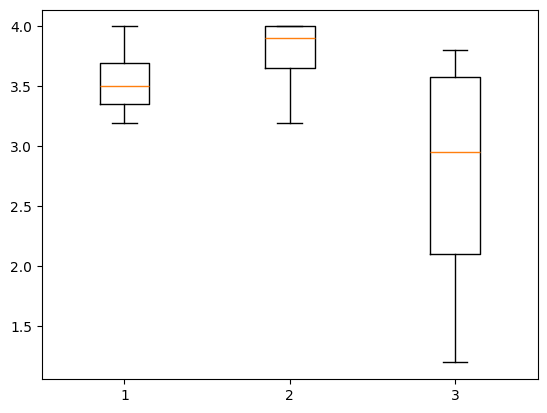

In [29]:
plt.boxplot(student_gpas.T)
plt.plot()

## About data types
* [data types](https://docs.scipy.org/doc/numpy-1.14.0/user/basics.types.html) are here
* Data types are maintained by wrapping values in a [scalar representation](https://numpy.org/doc/stable/reference/arrays.scalars.html)
* np.zeros is a good way to create an array of zeros and specify data type

In [30]:
study_minutes = np.zeros(7, np.uint16)
study_minutes

array([0, 0, 0, 0, 0, 0, 0], dtype=uint16)

In [31]:
%whos

Variable        Type       Data/Info
------------------------------------
gpas            ndarray    4: 4 elems, type `float64`, 32 bytes
gpas_as_list    list       n=4
np              module     Shape: <function shape at 0x000002B3487DAC00>
plt             module     <module 'matplotlib.pyplo<...>\\matplotlib\\pyplot.py'>
student_gpas    ndarray    3x4: 12 elems, type `float16`, 24 bytes
study_minutes   ndarray    7: 7 elems, type `uint16`, 14 bytes


In [32]:
study_minutes[0] = 150

In [33]:
first_day_minutes = study_minutes[0]

In [34]:
first_day_minutes

np.uint16(150)

In [35]:
type(first_day_minutes)

numpy.uint16

In [36]:
study_minutes[1] = 60

In [37]:
second_day_minutes = study_minutes[1]

In [38]:
second_day_minutes

np.uint16(60)

In [39]:
study_minutes[2:6] = [80, 60, 30, 90]

## Creation 
* `np.random` package.  
  * `RandomState` lets you seed randomness in a repeatable way
* You can append:
   * Use the `np.append` method.  Make sure the new row is the same shape
   * Create/reassign a new array by including the existing array as part of the iterable in creation (enclose in hard brackets)

## Indexing
* Use indexing shortcut by separating dimensions with a comma
* Index using a `list` or `np.array`.  Values will be pulled out at that specific index (Fancy indexing)

In [40]:
study_minutes = np.array([
    study_minutes,
    np.zeros(7, np.uint16)
])

In [41]:
study_minutes.shape

(2, 7)

In [42]:
study_minutes[1][0] = 60

In [43]:
rand = np.random.RandomState(42)
fake_log = rand.randint(30, 180, size=7, dtype=np.uint16)
fake_log

array([132, 122, 128,  44, 136, 129, 101], dtype=uint16)

In [44]:
[fake_log[3], fake_log[4]]

[np.uint16(44), np.uint16(136)]

In [45]:
fake_log[[3, 4]]

array([ 44, 136], dtype=uint16)

In [46]:
index = np.array([
    [3, 4],
    [0, 1]
])
fake_log[index]

array([[ 44, 136],
       [132, 122]], dtype=uint16)

In [47]:
study_minutes = np.append(study_minutes, [fake_log], axis=0)
study_minutes

array([[150,  60,  80,  60,  30,  90,   0],
       [ 60,   0,   0,   0,   0,   0,   0],
       [132, 122, 128,  44, 136, 129, 101]], dtype=uint16)

In [48]:
study_minutes[1, 1] = 360

## Boolean Array Indexing
* Create a boolean array by using comparison operators on an array
  * Use boolean arrays for fancy indexing
  * Boolean arrays can be compared by using bitwise operators (`&`, `|`)
      * Do not use the `and` keyword (will result in error)
      * Order of operations is important when combining comparisons
* Boolean indexing returns a new array, but the existing array can be updated using a boolean index

In [49]:
fake_log[fake_log < 60] 

array([44], dtype=uint16)

In [50]:
study_minutes[study_minutes < 60]

array([30,  0,  0,  0,  0,  0,  0, 44], dtype=uint16)

In [51]:
# Output is True if both values in same index spot in different arrays is the same
np.array([False, True, True]) & np.array([True, False, True])

array([False, False,  True])

In [52]:
# Parenthesis for order of operations
study_minutes[(study_minutes < 60) & (study_minutes > 0)]

array([30, 44], dtype=uint16)

In [53]:
study_minutes[study_minutes < 60] = 0
study_minutes

array([[150,  60,  80,  60,   0,  90,   0],
       [ 60, 360,   0,   0,   0,   0,   0],
       [132, 122, 128,   0, 136, 129, 101]], dtype=uint16)

## Common Routines
* Common [mathematical](https://docs.scipy.org/doc/numpy-1.14.0/reference/routines.math.html) [routines](https://docs.scipy.org/doc/numpy-1.14.0/reference/routines.html) are abstracted.
    * [`mean`](https://docs.scipy.org/doc/numpy-1.14.0/reference/generated/numpy.mean.html#numpy.mean) is a [statistics](https://docs.scipy.org/doc/numpy-1.14.0/reference/routines.statistics.html) routine used to calculate the average.
* Reduction functions take a dimension and collapse it into a single value.
    * These functions define an axis parameter, remember that the function works across the dimension.

In [54]:
np.add.reduce(study_minutes[0])

np.uint64(440)

In [55]:
np.add.accumulate(study_minutes[0])

array([150, 210, 290, 350, 350, 440, 440], dtype=uint64)

In [56]:
np.sum(study_minutes[0])

np.uint64(440)

In [57]:
np.sum(study_minutes, axis=1)

array([440, 420, 748], dtype=uint64)

[]

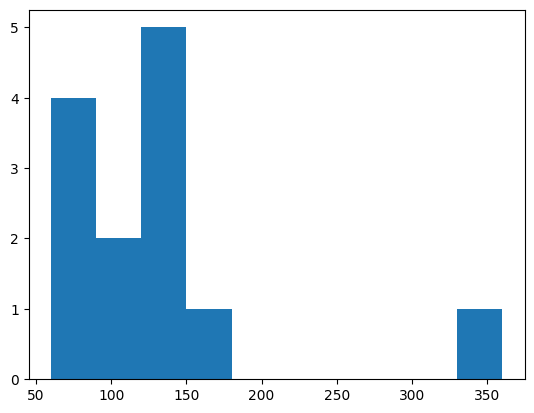

In [58]:
plt.hist(study_minutes[study_minutes > 0])
plt.plot()

## Slicing
* Similar to normal list slicing
* Use commas to separate each dimension slice
* Always returns a data view (assuming your slicing an ndarray)
* Base object can be accessed using the `ndarray.base` property

In [59]:
fruit = ['apple', 'banana', 'cherry', 'blueberry']

In [60]:
# Slicing is exclusive ("up to but not including")
fruit[1:3]

['banana', 'cherry']

In [61]:
fruit[:3]

['apple', 'banana', 'cherry']

In [62]:
fruit[3:]

['blueberry']

In [63]:
# Slicing a list returns a copy
copied = fruit[:]

In [64]:
copied[3] = 'cheese'
copied, fruit

(['apple', 'banana', 'cherry', 'cheese'],
 ['apple', 'banana', 'cherry', 'blueberry'])

In [65]:
fruit[::2]

['apple', 'cherry']

In [66]:
fruit[::-1]

['blueberry', 'cherry', 'banana', 'apple']

In [67]:
# Operates similar to range but sets range value within an array
np.arange(20)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19])

In [68]:
practice = np.arange(42)
practice.shape = (7, 6)
practice

array([[ 0,  1,  2,  3,  4,  5],
       [ 6,  7,  8,  9, 10, 11],
       [12, 13, 14, 15, 16, 17],
       [18, 19, 20, 21, 22, 23],
       [24, 25, 26, 27, 28, 29],
       [30, 31, 32, 33, 34, 35],
       [36, 37, 38, 39, 40, 41]])

In [69]:
practice[2:5, 3::2]

array([[15, 17],
       [21, 23],
       [27, 29]])

In [70]:
# Any slicing of ndarray return a view, not copy
not_copied = practice[:]
not_copied[0, 0] = 90210
practice, not_copied

(array([[90210,     1,     2,     3,     4,     5],
        [    6,     7,     8,     9,    10,    11],
        [   12,    13,    14,    15,    16,    17],
        [   18,    19,    20,    21,    22,    23],
        [   24,    25,    26,    27,    28,    29],
        [   30,    31,    32,    33,    34,    35],
        [   36,    37,    38,    39,    40,    41]]),
 array([[90210,     1,     2,     3,     4,     5],
        [    6,     7,     8,     9,    10,    11],
        [   12,    13,    14,    15,    16,    17],
        [   18,    19,    20,    21,    22,    23],
        [   24,    25,    26,    27,    28,    29],
        [   30,    31,    32,    33,    34,    35],
        [   36,    37,    38,    39,    40,    41]]))

In [71]:
practice.base is None

True

In [72]:
not_copied.base is None

False

In [73]:
not_copied.base is practice

True

In [74]:
practice.flags['OWNDATA'], not_copied.flags['OWNDATA']

(True, False)

## Array Manipulation
* Documentation on manipulation is [here](https://numpy.org/doc/stable/reference/routines.array-manipulation.html)
* `Unravel` is good for a flattened array view
* `Flattened` is good for a copy of the array that is also flattened
* `Reshape` creates a view with a new shape

In [75]:
practice_view = practice.reshape(3, 14)
practice, practice_view, practice_view.base is practice

(array([[90210,     1,     2,     3,     4,     5],
        [    6,     7,     8,     9,    10,    11],
        [   12,    13,    14,    15,    16,    17],
        [   18,    19,    20,    21,    22,    23],
        [   24,    25,    26,    27,    28,    29],
        [   30,    31,    32,    33,    34,    35],
        [   36,    37,    38,    39,    40,    41]]),
 array([[90210,     1,     2,     3,     4,     5,     6,     7,     8,
             9,    10,    11,    12,    13],
        [   14,    15,    16,    17,    18,    19,    20,    21,    22,
            23,    24,    25,    26,    27],
        [   28,    29,    30,    31,    32,    33,    34,    35,    36,
            37,    38,    39,    40,    41]]),
 True)

In [76]:
practice.reshape(-1, 2).shape

(21, 2)

In [77]:
practice.ravel()

array([90210,     1,     2,     3,     4,     5,     6,     7,     8,
           9,    10,    11,    12,    13,    14,    15,    16,    17,
          18,    19,    20,    21,    22,    23,    24,    25,    26,
          27,    28,    29,    30,    31,    32,    33,    34,    35,
          36,    37,    38,    39,    40,    41])

In [78]:
np.ravel?

Signature:       np.ravel(a, order='C')
Call signature:  np.ravel(*args, **kwargs)
Type:            _ArrayFunctionDispatcher
String form:     <function ravel at 0x000002B3487DA980>
File:            c:\users\blaise\appdata\local\programs\python\python313\lib\site-packages\numpy\_core\fromnumeric.py
Docstring:      
Return a contiguous flattened array.

A 1-D array, containing the elements of the input, is returned.  A copy is
made only if needed.

As of NumPy 1.10, the returned array will have the same type as the input
array. (for example, a masked array will be returned for a masked array
input)

Parameters
----------
a : array_like
    Input array.  The elements in `a` are read in the order specified by
    `order`, and packed as a 1-D array.
order : {'C','F', 'A', 'K'}, optional

    The elements of `a` are read using this index order. 'C' means
    to index the elements in row-major, C-style order,
    with the last axis index changing fastest, back to the first
    axis index chan

## Linear Algebra
* NumPy module for linear algebra, [linalg](https://docs.scipy.org/doc/numpy/reference/routines.linalg.html)
* Solve for a system of equations using the [solve function](https://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.solve.html#numpy.linalg.solve)
    * It's possible to create a square 2 dimensional matrix and a constant row vector and solve for each variable column
    * Double check the answer using the inner product or [dot](https://docs.scipy.org/doc/numpy/reference/generated/numpy.dot.html#numpy.dot).
* Use the `@` to produce the dot product of two arrays.

In [79]:
# columns: tacos, burritos, horchatas, cokes
orders = np.array([
    [2, 0, 0, 0],
    [4, 1, 2, 2],
    [0, 1, 0, 1],
    [6, 0, 1, 2]
])
totals = np.array([3, 20.50, 10, 14.25])
prices = np.linalg.solve(orders, totals)
prices

array([1.5 , 8.  , 1.25, 2.  ])

In [80]:
# A * B
orders @ prices

array([ 3.  , 20.5 , 10.  , 14.25])

In [81]:
orders.dot(prices)

array([ 3.  , 20.5 , 10.  , 14.25])

## Universal Functions
* [ufuncs](https://docs.scipy.org/doc/numpy/reference/ufuncs.html) are commonly needed vectorized functions
  * Vectorized functions allow users to operate element by element without using a loop
* The standard math and comparison operations have all been overloaded so that they can make use of vectorization
* Values can be [broadcasted](https://docs.scipy.org/doc/numpy/user/basics.broadcasting.html), or stretched to be applied to the ufuncs

In [82]:
a, b = np.split(np.arange(1, 11), 2)
a, b

(array([1, 2, 3, 4, 5]), array([ 6,  7,  8,  9, 10]))

In [83]:
a + b

array([ 7,  9, 11, 13, 15])

In [84]:
b - a

array([5, 5, 5, 5, 5])

In [85]:
# This is called broadcasting where 2 is broadcasted across the array (a)
a + np. repeat(2, 5)

array([3, 4, 5, 6, 7])

In [86]:
np.add(1.0, 4.0)

np.float64(5.0)

In [87]:
x1 = np.arange(9.0).reshape((3, 3))
x2 = np.arange(3.0)
x1, x2

(array([[0., 1., 2.],
        [3., 4., 5.],
        [6., 7., 8.]]),
 array([0., 1., 2.]))

In [88]:
np.add(x1, x2)

array([[ 0.,  2.,  4.],
       [ 3.,  5.,  7.],
       [ 6.,  8., 10.]])